In [1]:
import numpy as np
import matplotlib.pyplot as plt

import segyio

In [2]:
seismic_file = "data/data_decatur/seismic/seismic.segy"
porosity_file = "data/data_decatur/seismic/porosity.segy"

with segyio.open(seismic_file) as f:

    print("Number of traces:", f.tracecount)
    print("Length of each trace:", f.samples.size)
    print("Range of depth (ft):", f.samples[0], "-", f.samples[-1])
        
    inlines = f.attributes(segyio.TraceField.INLINE_3D)[:]
    print("Inline min:", inlines.min())  
    print("Inline max:", inlines.max())  
    
    xlines = f.attributes(segyio.TraceField.CROSSLINE_3D)[:]
    print("Crossline min :", xlines.min())  
    print("Crossline max:", xlines.max())  

Número de trazas: 221613
Longitud de cada traza: 124
Rango de tiempos (ms): 4540.0 - 7000.0
Inline min: 13
Inline max: 195
Crossline min : 930
Crossline max: 2140


In [3]:
seismic = segyio.tools.cube(seismic_file)
porosity = segyio.tools.cube(porosity_file)

In [4]:
seismic = seismic[40:,:,8:-30]
porosity = porosity[40:,:,8:-30]

In [5]:
porosity.shape, seismic.shape

((143, 1211, 86), (143, 1211, 86))

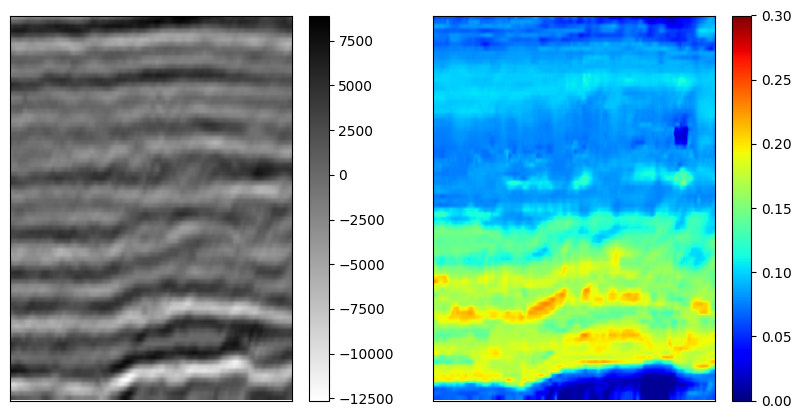

In [6]:
base = 40
inline = 40
fig, ax  = plt.subplots(1,2, figsize=(10,5))

sim = ax[0].imshow(seismic[inline-base,:,:].T, cmap='gray_r')
fig.colorbar(sim, ax=ax[0])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].invert_xaxis()
ax[0].set_aspect('auto')

sim1 = ax[1].imshow(porosity[inline-base,:,:].T, cmap='jet', vmin=0, vmax=0.3)
fig.colorbar(sim1, ax=ax[1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].invert_xaxis()
ax[1].set_aspect('auto')

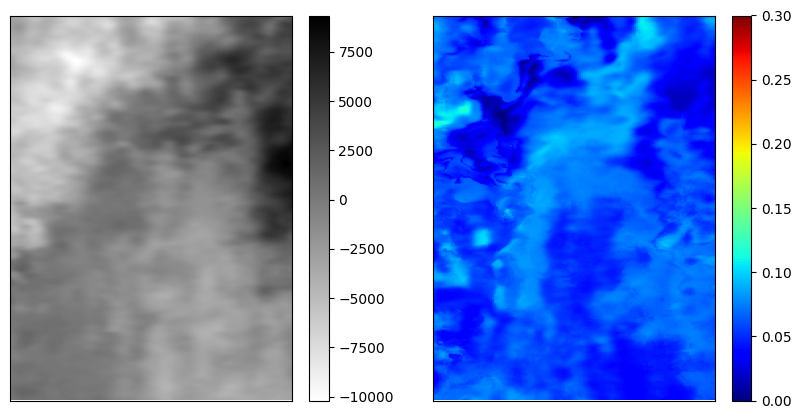

In [7]:

fig, ax  = plt.subplots(1,2, figsize=(10,5))

sim = ax[0].imshow(seismic[:,:,0].T, cmap='gray_r')
fig.colorbar(sim, ax=ax[0])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].invert_xaxis()
ax[0].set_aspect('auto')

sim1 = ax[1].imshow(porosity[:,:,0].T, cmap='jet', vmin=0, vmax=0.3)
fig.colorbar(sim1, ax=ax[1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].invert_xaxis()
ax[1].set_aspect('auto')

In [8]:
np.save('data/data_decatur/processed/porosity_full.npy', porosity)
np.save('data/data_decatur/processed/seismic_full.npy', seismic)

In [9]:
print('Amplitude IL/XL shape: ' + str(np.shape(seismic)[0]) + ' / ' +str(np.shape(seismic)[1])) 

Amplitude IL/XL shape: 143 / 1211


In [10]:
with segyio.open(seismic_file, "r") as segyfile:
    print('Amplitude Inline range: ' + str(np.amin(segyfile.ilines)) + ' - ' +str(np.amax(segyfile.ilines))) 
    print('Amplitude Crossline range: ' + str(np.amin(segyfile.xlines)) + ' - ' +str(np.amax(segyfile.xlines)))

Amplitude Inline range: 13 - 195
Amplitude Crossline range: 930 - 2140


In [11]:
mature_block = seismic[:, 1300-930:, :]
exploration_block = seismic[:, 0:1300-930, :]

In [12]:
mature_block_porosity = porosity[:, 1300-930:, :]
exploration_block_porosity = porosity[:, 0:1300-930, :]

# Exploration of Results

## Full Seismic

In [13]:
np.min(seismic), np.max(seismic)

(-16285.352, 17384.969)

## Mature Seismic

In [14]:
mature_block.shape, mature_block_porosity.shape

((143, 841, 86), (143, 841, 86))

In [15]:
np.min(mature_block), np.max(mature_block)

(-16285.352, 17384.969)

In [16]:
np.min(mature_block_porosity), np.max(mature_block_porosity)

(-0.0027321053, 0.25938374)

(array([9.410000e+02, 1.475800e+04, 1.619800e+05, 1.279260e+06,
        4.671343e+06, 3.336324e+06, 8.245180e+05, 4.666400e+04,
        5.989000e+03, 8.410000e+02]),
 array([-16285.3515625 , -12918.31933594,  -9551.28710938,  -6184.25537109,
         -2817.22338867,    549.80859375,   3916.84057617,   7283.87255859,
         10650.90429688,  14017.93652344,  17384.96875   ]),
 <BarContainer object of 10 artists>)

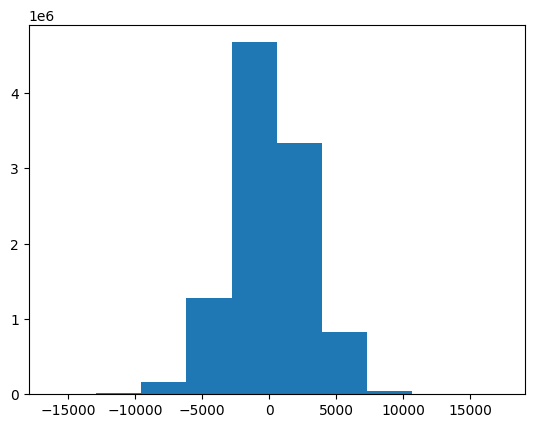

In [17]:
plt.hist(mature_block.flatten())

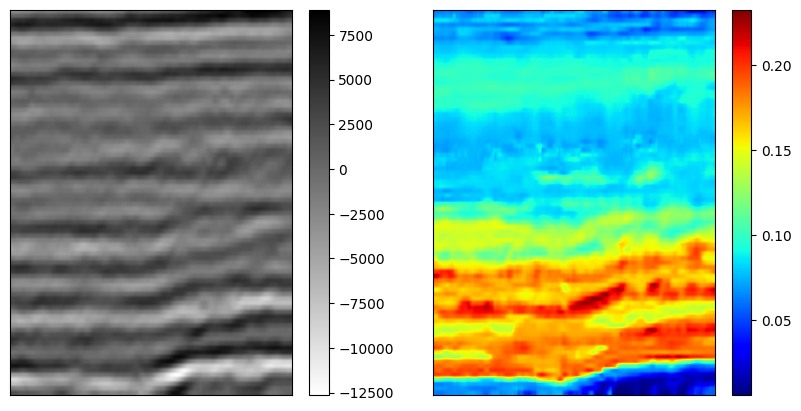

In [18]:
inline = 46
fig, ax  = plt.subplots(1,2, figsize=(10,5))

sim = ax[0].imshow(mature_block[inline-46,:,:].T, cmap='gray_r')
fig.colorbar(sim, ax=ax[0])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].invert_xaxis()
ax[0].set_aspect('auto')

sim1 = ax[1].imshow(mature_block_porosity[inline-46,:,:].T, cmap='jet')
fig.colorbar(sim1, ax=ax[1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].invert_xaxis()
ax[1].set_aspect('auto')

## Exploration Seismic

In [19]:
exploration_block.shape, exploration_block_porosity.shape

((143, 370, 86), (143, 370, 86))

In [20]:
np.min(exploration_block), np.max(exploration_block)

(-12686.52, 11076.34)

In [21]:
np.min(exploration_block_porosity), np.max(exploration_block_porosity)

(-0.0024795132, 0.25698662)

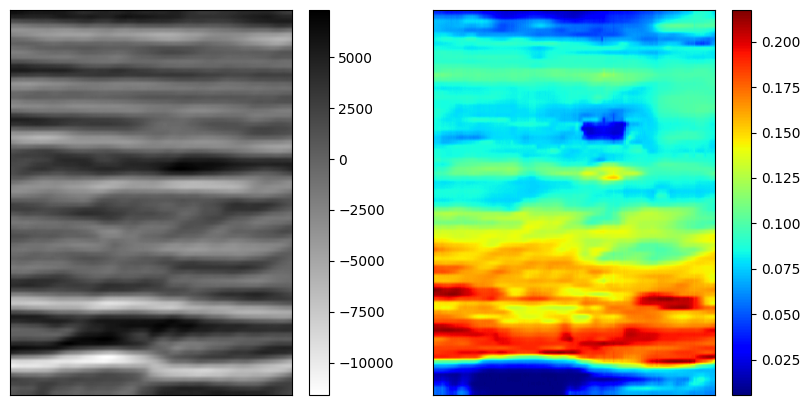

In [22]:
inline = 46
fig, ax  = plt.subplots(1,2, figsize=(10,5))

sim = ax[0].imshow(exploration_block[inline-46,:,:].T, cmap='gray_r')
fig.colorbar(sim, ax=ax[0])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].invert_xaxis()
ax[0].set_aspect('auto')

sim1 = ax[1].imshow(exploration_block_porosity[inline-46,:,:].T, cmap='jet')
fig.colorbar(sim1, ax=ax[1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].invert_xaxis()
ax[1].set_aspect('auto')

# Data Export

In [23]:
np.save('data/data_decatur/processed/seismic_mature_block.npy', mature_block)
np.save('data/data_decatur/processed/seismic_exploration_block.npy', exploration_block)

In [24]:
np.save('data/data_decatur/processed/porosity_mature_block.npy', mature_block_porosity)
np.save('data/data_decatur/processed/porosity_exploration_block.npy', exploration_block_porosity)